In [ ]:
!pip install PyPDF2
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import math
import pandas as pd
import random
import string
import PyPDF2
import re

In [ ]:
# # Completing the dictionary for letter-to-number mapping
# letter_to_number_lookup = {
#     'a': 0,
#     'b': 1,
#     'c': 2,
#     'd': 3,
#     'e': 4,
#     'f': 5,
#     'g': 6,
#     'h': 7,
#     'i': 8,
#     'j': 9,
#     'k': 10,
#     'l': 11,
#     'm': 12,
#     'n': 13,
#     'o': 14,
#     'p': 15,
#     'q': 16,
#     'r': 17,
#     's': 18,
#     't': 19,
#     'u': 20,
#     'v': 21,
#     'w': 22,
#     'x': 23,
#     'y': 24,
#     'z': 25,
#     '@' : 26
# }



In [ ]:


def cipher_generation(matrix, key):
    """
    inputs : matrix, key of length  matrix's columns
    output : cipher text
    """
#     print(" the matrix i got is \n",matrix)

    sorted_key = sorted(key)
#     print("sorted key ",sorted_key)
    cipher_text = ""
    for k in sorted_key:
#         print("the column is ",k)
#         print("now it appends ",matrix.loc[:,k].sum())
#         print("")
        cipher_text += matrix.loc[:,k].sum()

    return cipher_text


In [ ]:
def matrix_creation_for_plaintext(plaintext, key):
    """
    inputs : plaintext of type string, n ---> number of rows, m ---> number of columns

    output : returns matrix of type numpy array
    """
    m = 10

    n = 8

    matrix = np.empty((n, m), dtype=str) # creating a n,m dimension matrix

    plaintext = plaintext.lower().replace(" ", "")
    curr = 0
    for i in range(n):   # rows
        for j in range(m):   # columns
            if curr < len(plaintext):
                matrix[i][j] = plaintext[curr]
                curr += 1
            else :
                matrix[i][j] = 'z'
                curr +=1

    key_lst = [k for k in key]
    df = pd.DataFrame(matrix, columns = key_lst)
    return df

def key_giver():
    """
    inputs : None
    output : key of size 10
    """
    alphabets = list(string.ascii_lowercase)

    unique_key = random.sample(alphabets, 10)

    while len(set(unique_key)) != 10:
            unique_key = random.sample(alphabets, 10)
    return unique_key

def read_my_pdf(file_path):
    """
    uses pypdf2 library to read
    inputs : file_path
    and returns the text
    """
    with open(file_path,'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
#             reader.pages[page_number]
            text += page.extract_text()
    return text

def read_text(file_path):
    with open(file_path, 'r', encoding = "utf-8") as file:
        text = file.read()
    return text

def split_text_into_chunks(text):
    min_chunk_length = 70
    max_chunk_length=80
    # Use regex to split the text at spaces or periods while ensuring the chunk length is less than the specified maximum
    chunks = re.findall(r'\S.{%d,%d}(?:\s|$|[.])' % (min_chunk_length - 1, max_chunk_length - 1), text)
    return chunks

In [ ]:

key = key_giver()
plaintext = "onceupon a time there lived a ghost . he is  not a myth anymore ! abrakadabra . i am batman"
matrix_plaintext = matrix_creation_for_plaintext(plaintext,key)
cipher_text = cipher_generation(matrix_plaintext, key)
matrix_plaintext


,x,g,a,l,c,v,i,o,f,p
0,o,n,c,e,u,p,o,n,a,t
1,i,m,e,t,h,e,r,e,l,i
2,v,e,d,a,g,h,o,s,t,.
3,h,e,i,s,n,o,t,a,m,y
4,t,h,a,n,y,m,o,r,e,!
5,a,b,r,a,k,a,d,a,b,r
6,a,.,i,a,m,b,a,t,m,a
7,n,z,z,z,z,z,z,z,z,z


In [ ]:
matrix_plaintext
type(cipher_text)
len(cipher_text)
# len(plaintext)

80

In [ ]:
matrix_plaintext
cipher_text

'cediarizuhgnykmzaltmebmznmeehb.zorotodazetasnaaznesaratzti.y!razpehomabzoivhtaan'

In [ ]:
file_path = "all books"+".txt"

In [ ]:
key_giver()

['q', 'l', 'j', 'p', 'm', 'b', 't', 'n', 's', 'd']

In [ ]:
# all_text = read_my_pdf(file_path)
all_text = read_text(file_path)

In [ ]:
text_chunks = split_text_into_chunks(all_text)

In [ ]:
len(text_chunks)


13791

In [ ]:
i = 0
all_cipher = []
for plaintext in text_chunks:
    key = key_giver()
    matrix_plaintext = matrix_creation_for_plaintext(plaintext,key)
    cipher_text = cipher_generation(matrix_plaintext, key)
    all_cipher.append([cipher_text,1])
    i += 1


cipher_df =pd.DataFrame(all_cipher,columns = ["cipher_text", "label"])
cipher_df



#     print(type(curr))
#     print(" next \n \n")


,cipher_text,label
0,pwoas\nzzorrtmrzzmaosltzztsdnsczzstlaoizzooadt...,1
1,"aotaitzzrptutzzzsmgourzztu,ytezzeyvrdszzhyiwee...",1
2,arieauzztoteetzzhmhsvozzdwgvetzznenrrszzrrnwer...,1
3,allwohzzllfhuezzewrhwzzznoyitzzztiynvtzzohtnhz...,1
4,"ttrekszzhmeetszz,fodatzzyo,itazzassa;hzzhhtnee...",1
...,...,...
13786,"e0yieozzs0otmmzzânolp\nzzb,r,hhzz£dnbozzz0ostw...",1
13787,athoizzztiimetzz©tstmnzzisbashzznpafczzzmdotse...,1
13788,1hshnlzz0etitazz8e0oiazz.ancedzz£i2giizz8l2ttt...,1
13789,ulmirszztmfaazzzgaenr\nzzhiocizzzeeaâsgzzcci2o...,1


In [ ]:
# 6 books now
# romeo julilet , alice adv, Dracula, pride and prejudice, frankinstein, sherlock (adventures)
cipher_df.to_pickle("cipher_df.pkl")

In [ ]:
len(all_text.split(" "))

550534

In [ ]:
df = pd.read_pickle("cipher_df.pkl")

In [ ]:
df.head()

,cipher_text,label
0,pwoas\nzzorrtmrzzmaosltzztsdnsczzstlaoizzooadt...,1
1,"aotaitzzrptutzzzsmgourzztu,ytezzeyvrdszzhyiwee...",1
2,arieauzztoteetzzhmhsvozzdwgvetzznenrrszzrrnwer...,1
3,allwohzzllfhuezzewrhwzzznoyitzzztiynvtzzohtnhz...,1
4,"ttrekszzhmeetszz,fodatzzyo,itazzassa;hzzhhtnee...",1


In [ ]:
df_random = pd.read_csv("random_words.csv")


In [ ]:
df_random.columns

Index(['CipherText', 'Label'], dtype='object')

In [ ]:
df_random = df_random.rename(columns = {"CipherText" : "cipher_text"})
df_random = df_random.rename(columns = {"Label" : "label"})


In [ ]:
df_all = pd.concat([df,df_random], ignore_index= True)

In [ ]:
df_all["label"].value_counts()
# df_all = df_all.iloc[:-5500]

1    13791
0    10000
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_all["cipher_text"], df_all["label"], test_size = 0.2, random_state = 42)

In [ ]:
# X_train = X_train.loc[:-2500]
X_train.shape

(19032,)

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [ ]:
model.fit(X_train_transformed,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test_transformed)

In [ ]:
accuracy_score(y_test, y_pred)

0.574070182811515

In [ ]:
df_all["label"].value_counts()

1    13791
0    10000
Name: label, dtype: int64

In [ ]:
# my accuracies are
#0.57 for 19000 records
# 0.65 for 17000 records
# 0.87 for 12632 records

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_all["cipher_text"], df_all["label"], test_size=0.2, random_state=42)


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_length = max(max(len(seq) for seq in X_train_sequence), max(len(seq) for seq in X_test_sequence))
X_train_padded = pad_sequences(X_train_sequence, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequence, maxlen=max_length, padding='post')


In [ ]:
# Create and train the CNN model
embedding_dim = 50  # Adjust as needed
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Make predictions on the test set
y_pred_probs = model.predict(X_test_padded)
y_pred = np.round(y_pred_probs)

149/149 [==============================] - 1s 6ms/step


In [ ]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5467535196469847


In [ ]:
!pip install seaborn


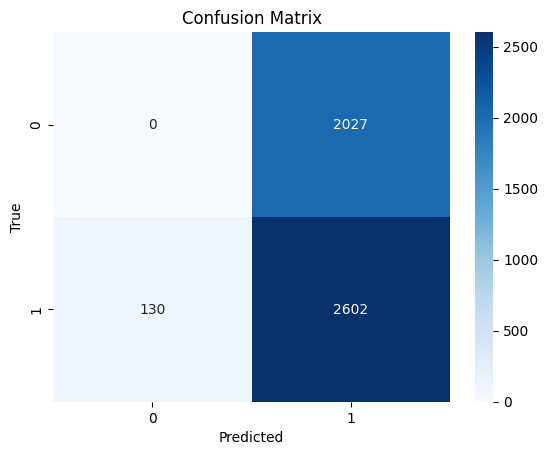

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
